<a href="https://colab.research.google.com/github/deboraos/heart-attack-statistics/blob/main/Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
% matplotlib inline

In [2]:
heart = pd.read_csv ('https://raw.githubusercontent.com/deboraos/heart-attack-statistics/4086c7e99af0c09de750ca4a407d70a0292f576f/heart.csv')
heart.head ()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

heartcopy = heart.copy()
X = heartcopy.iloc[:,0:13]  #attributes column
y = heartcopy.iloc[:,-1]    #target column 

#SelectKBest - extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
heartscores = pd.DataFrame(fit.scores_)
heartcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([heartcolumns,heartscores],axis=1)
featureScores.columns = ['Attribute','Score']  
print(featureScores.nlargest(10,'Score'))

   Attribute       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


In [5]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 10

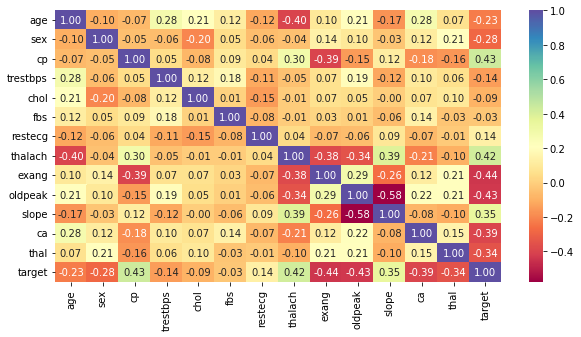

In [6]:

sns.heatmap(heart.corr(),annot=True,fmt='.2f',cmap="Spectral")

In [7]:
sns.set_style('ticks') 
sns.set_palette('icefire')

In [8]:
heart2 = heart.copy()
def chng(sex):
  if sex == 0:
    return 'female'
  else:
    return 'male'
heart2['sex'] = heart2['sex'].apply(chng)
def chng2(prob):
  if prob == 0:
    return 'Heart Disease'
  else:
    return 'No Heart Disease'
heart2['target'] = heart2['target'].apply(chng2)

Text(0.5, 1.0, 'Sex v/s target\n')

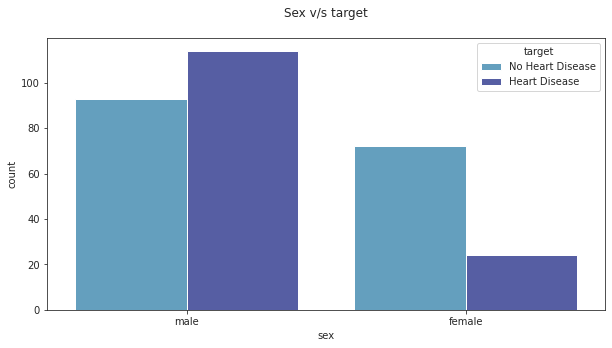

In [9]:
sns.countplot(data= heart2, x='sex',hue='target')
plt.title('Sex v/s target\n')

In [10]:
heartdisease = heart[heart['target'] == 0]
qtd = heartdisease['age'].count()
k = round(np.log10(qtd) / np.log10(2))
max = heartdisease['age'].max()
min = heartdisease['age'].min()
h = round((max - min)/k)

In [11]:
## Frequency table

## count
frequency = pd.value_counts(pd.cut(x = heartdisease.age, bins = h, include_lowest = True))

## percentage
percentage = pd.value_counts(pd.cut(x=heartdisease.age, bins = h, include_lowest = True), normalize = True) * 100

## Formatting Frequency Table
frequency_table = ({'frequency' : frequency, 'percentage' : percentage})

## Transforming into DataFrame
frequency_table = pd.DataFrame(frequency_table)

## Reseting index 
frequency_table.reset_index(inplace=True)

## Renaming columns
frequency_table.rename(columns={'index' : 'range age'}, inplace = True)

frequency_table

,range age,frequency,percentage
0,"(56.0, 63.0]",59,42.753623
1,"(49.0, 56.0]",29,21.014493
2,"(63.0, 70.0]",23,16.666667
3,"(42.0, 49.0]",18,13.043478
4,"(34.957, 42.0]",8,5.797101
5,"(70.0, 77.0]",1,0.724638


Text(0.5, 1.0, 'Age Frequency Heart Disease\n')

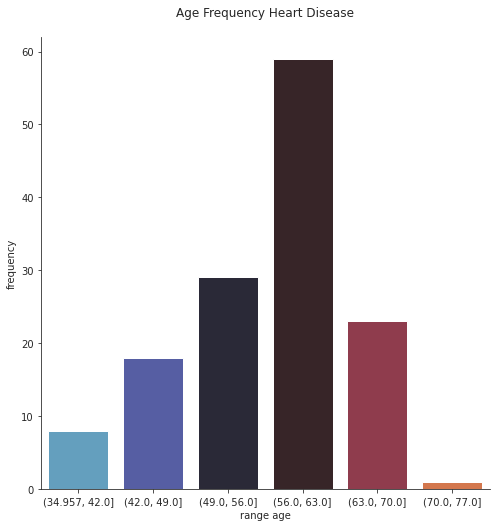

In [12]:
sns.catplot(x="range age", y="frequency", kind="bar", height=7, data=frequency_table)
plt.title('Age Frequency Heart Disease\n')

Text(0.5, 1.0, 'Age vs chol (Heart Diseased Patinets)\n')

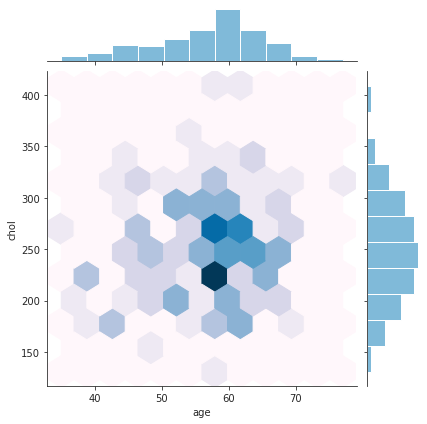

In [13]:
sns.jointplot (data = heartdisease,x = 'age',y = 'chol',kind = 'hex',cmap = 'PuBu')
plt.title('Age vs chol (Heart Diseased Patinets)\n')

In [14]:
ENDOG = list(heart.columns)[13]
print(ENDOG)

EXOGS = list(heart.columns)
del EXOGS[13]
print(EXOGS)

target
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

encoder = preprocessing.LabelEncoder()
scaler = MinMaxScaler()

In [16]:
x = scaler.fit_transform(heart[EXOGS])
y = encoder.fit_transform(heart[ENDOG])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [18]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
clf.coef_

array([[-0.8941783 , -1.48812155,  1.84587015, -0.6606702 , -0.39342199,
         0.08054556,  0.29329327,  0.94223954, -1.0874625 , -1.72872149,
         0.91776633, -1.4285777 , -0.98600882]])

In [20]:
clf.score(X_train, y_train)

0.8443396226415094

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8461538461538461


In [23]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        37
           1       0.87      0.87      0.87        54

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



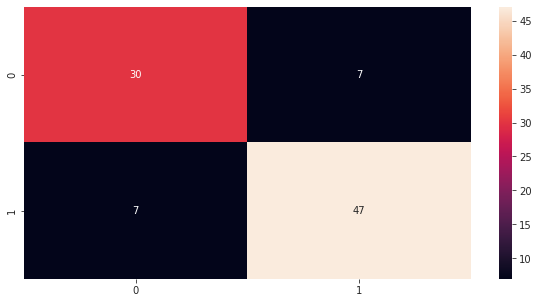

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8405905905905904

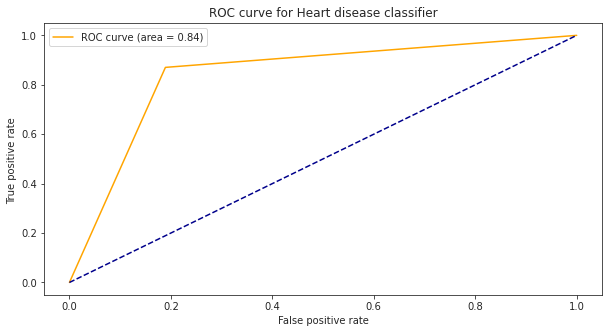

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_value = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,color='orange', label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate ')
plt.legend()
plt.show()

In [31]:
print(clf.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(clf.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[1.74623313]


,Coeffecient
cp,1.845870
thalach,0.942240
slope,0.917766
restecg,0.293293
fbs,0.080546
chol,-0.393422
trestbps,-0.660670
age,-0.894178
thal,-0.986009
exang,-1.087462


<Figure size 720x864 with 0 Axes>

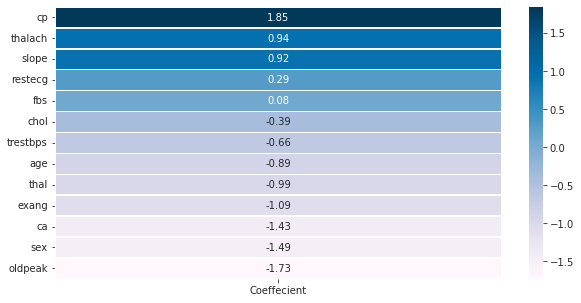

In [32]:
coeffecients = pd.DataFrame(clf.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sns.heatmap(coeffecients,annot=True,fmt='.2f',cmap='PuBu',linewidths=0.5)